In [1]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [20]:
import pandas as pd
import numpy as np
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [3]:
Roosevelt= inaugural.raw('1941-Roosevelt.txt')
Kennedy= inaugural.raw('1961-Kennedy.txt')
Nixon= inaugural.raw('1973-Nixon.txt')

# **2.1 Find the number of characters, words, and sentences for the mentioned documents.**

In [4]:
characters = len(Roosevelt)
print('Number of characters in Roosevelt file:', characters)

characters = len(Kennedy)
print('Number of characters in Roosevelt file:', characters)

characters = len(Nixon)
print('Number of characters in Roosevelt file:', characters)

Number of characters in Roosevelt file: 7571
Number of characters in Roosevelt file: 7618
Number of characters in Roosevelt file: 9991


In [5]:
words= Roosevelt.split()
print('Number of words in Roosevelt file:', len(words))

words= Kennedy.split()
print('Number of words in Kennedy file:', len(words))

words= Nixon.split()
print('Number of words in Nixon file:', len(words))

Number of words in Roosevelt file: 1360
Number of words in Kennedy file: 1390
Number of words in Nixon file: 1819


In [6]:
y = pd.DataFrame({'Text':Roosevelt}, index = [1])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
1,On each national day of inauguration since 178...,67


In [7]:
y = pd.DataFrame({'Text':Kennedy}, index = [2])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
2,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [8]:
y = pd.DataFrame({'Text':Nixon}, index = [3])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
3,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


# **2.2 Remove all the stopwords from all three speeches.**

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stop_words = stopwords.words('english')
import nltk
nltk.download('punkt')
word_tokens = word_tokenize(Roosevelt)

filtered_sentence = [x for x in word_tokens if not x in stop_words]
filtered_sentence =[]

for x in word_tokens:
   if x not in stop_words:
        filtered_sentence.append(x)

print(word_tokens)
print(filtered_sentence)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Kennedy)

filtered_sentence = [x for x in word_tokens if not x in stop_words]
filtered_sentence =[]

for x in word_tokens:
   if x not in stop_words:
        filtered_sentence.append(x)

print(word_tokens)
print(filtered_sentence)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [28]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Nixon)

filtered_sentence = [x for x in word_tokens if not x in stop_words]
filtered_sentence =[]

for x in word_tokens:
   if x not in stop_words:
        filtered_sentence.append(x)

print(word_tokens)
print(filtered_sentence)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

# **2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)**

In [29]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(x.title() for x in roosevelt_no_punc if x.lower() not in stopwords.words())
word_count = Counter(x.title() for x in roosevelt_no_punc if x.lower() not in stopwords.words())
word_count.most_common(3)

[('Nation', 12), ('Spirit', 9), ('Life', 9)]

In [30]:
tokenizer = RegexpTokenizer(r'\w+')
kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(x.title() for x in kennedy_no_punc if x.lower() not in stopwords.words())
word_count = Counter(x.title() for x in kennedy_no_punc if x.lower() not in stopwords.words())
word_count.most_common(3)

[('World', 8), ('Sides', 8), ('Pledge', 7)]

In [31]:
tokenizer = RegexpTokenizer(r'\w+')
nixon_no_punc = tokenizer.tokenize(Nixon)
set(x.title() for x in nixon_no_punc if x.lower() not in stopwords.words())
word_count = Counter(x.title() for x in nixon_no_punc if x.lower() not in stopwords.words())
word_count.most_common(3)

[('America', 21), ('Peace', 19), ('World', 18)]

# **2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)**

In [32]:
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

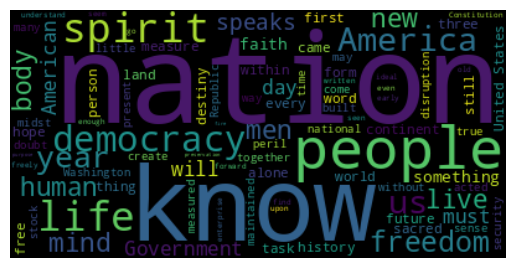

In [57]:
text= inaugural.raw('1941-Roosevelt.txt')
text = re.sub(r'==.*?==+, ', '', text)
text = text.replace('\n', '')

# Create and generate a word cloud image:
from wordcloud import STOPWORDS, WordCloud
wordcloud = WordCloud().generate(text)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

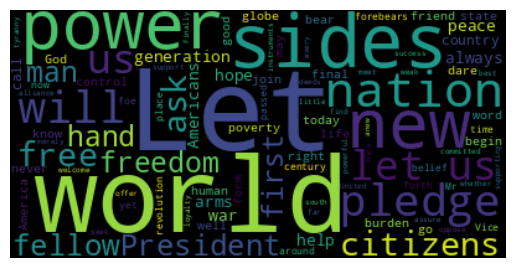

In [59]:
text= inaugural.raw('1961-Kennedy.txt')
text = re.sub(r'==.*?==+, ', '', text)
text = text.replace('\n', '')

# Create and generate a word cloud image:
from wordcloud import STOPWORDS, WordCloud
wordcloud = WordCloud().generate(text)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

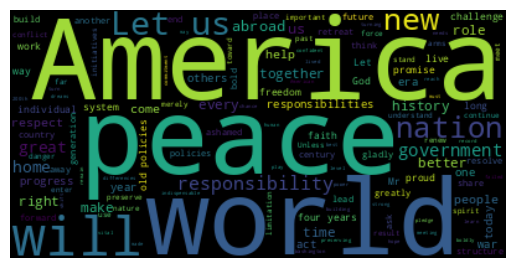

In [60]:
text= inaugural.raw('1973-Nixon.txt')
text = re.sub(r'==.*?==+, ', '', text)
text = text.replace('\n', '')

# Create and generate a word cloud image:
from wordcloud import STOPWORDS, WordCloud
wordcloud = WordCloud().generate(text)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The End**